In [2]:
import numpy as np

def single_bandit(n_arm, q_true, q_est, epsilon, steps, alpha=None, stationary=True, ucb_c=None):
    act_counts = np.zeros(n_arm)
    rewards = list()
    opt_act = np.argmax(q_true)
    opt_acts = list()
    for i in range(steps):
        # for exercise 2.5
        if not stationary:
            q_true += np.random.randn(n_arm) * 0.01
            opt_act = np.argmax(q_true)
        # for figure 2.4
        if ucb_c:
            a = np.argmax(q_est + ucb_c * np.sqrt(np.log(i + 1) / (act_counts + 1e-5)))
        elif np.random.rand() < epsilon:
        	a = np.random.choice(n_arm)
        else:
        	a = np.argmax(q_est)
        act_counts[a] += 1
        reward = q_true[a] + np.random.randn()
        rewards.append(reward)
        opt_acts.append(int(a == opt_act))
        # for exercise 2.5
        if alpha:
            q_est[a] += alpha * (reward - q_est[a])
        else:
            q_est[a] += 1 / act_counts[a] * (reward - q_est[a])
    return rewards, opt_acts

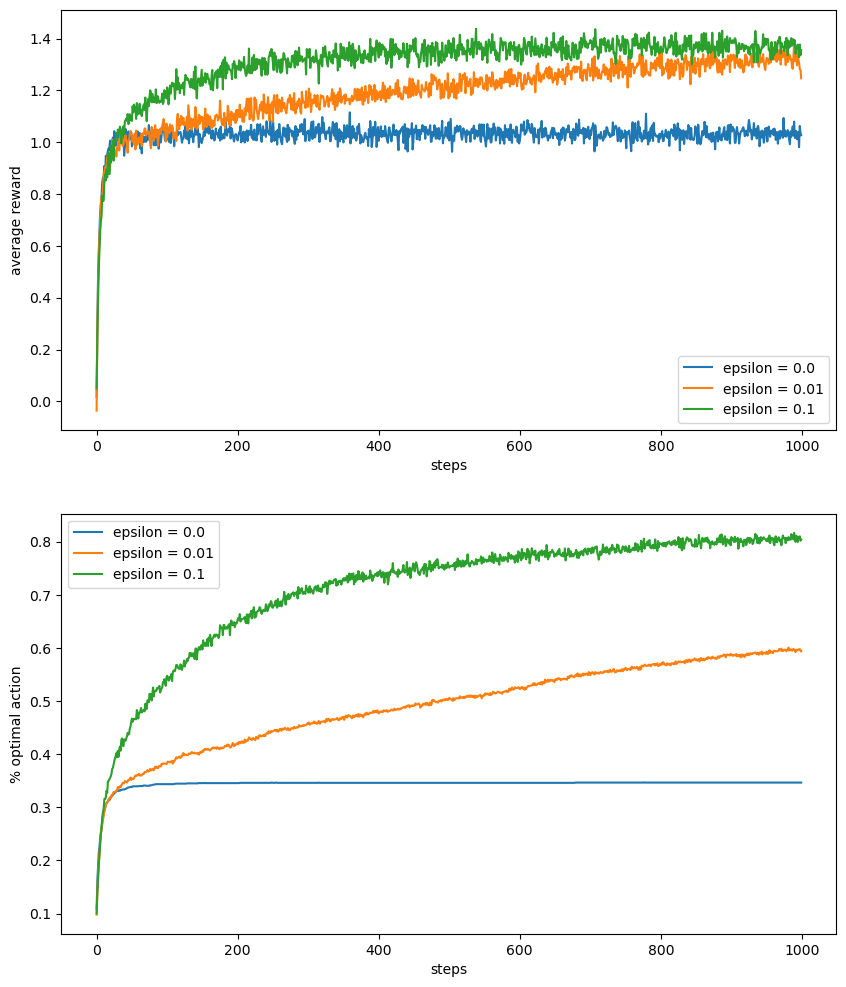

In [3]:
import matplotlib.pyplot as plt

n_arm = 10
rewards = {}
opt_acts = {}
for epsilon in [0.0, 0.01, 0.1]:
	res = [single_bandit(n_arm, np.random.randn(n_arm), np.zeros(n_arm), epsilon, 1000, alpha=None, stationary=True) for i in range(2000)]
	rs_, as_ = np.array(list(zip(*res))).mean(axis=1)
	rewards[epsilon] = rs_
	opt_acts[epsilon] = as_


plt.figure(figsize=(10, 12))

plt.subplot(2, 1, 1)
for k, v in rewards.items():
	plt.plot(v, label=f'epsilon = {k}')
plt.xlabel('steps')
plt.ylabel('average reward')
plt.legend()

plt.subplot(2, 1, 2)
for k, v in opt_acts.items():
	plt.plot(v, label=f'epsilon = {k}')
plt.xlabel('steps')
plt.ylabel('% optimal action')
plt.legend()
plt.show()

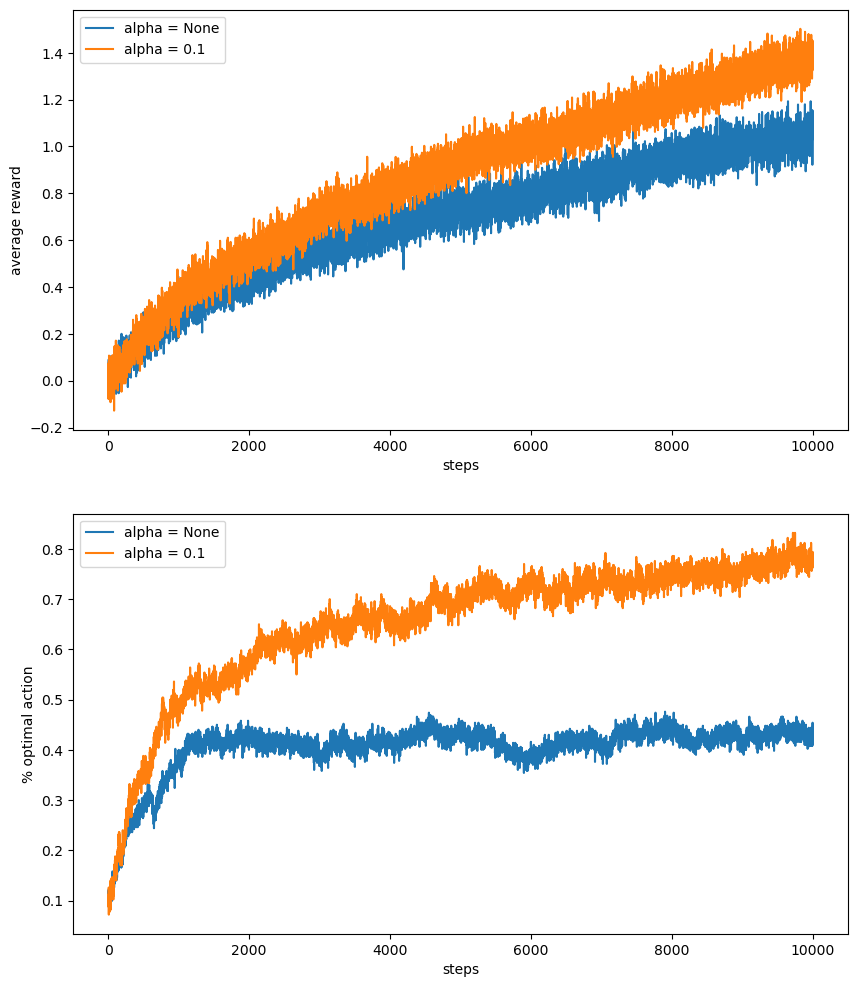

In [4]:
import matplotlib.pyplot as plt

n_arm = 10
rewards = {}
opt_acts = {}
for alpha in [None, 0.1]:
	res = [single_bandit(n_arm, np.zeros(n_arm), np.zeros(n_arm), 0.1, 10000, alpha, False) for i in range(500)]
	rs_, as_ = np.array(list(zip(*res))).mean(axis=1)
	rewards[alpha] = rs_
	opt_acts[alpha] = as_

plt.figure(figsize=(10, 12))

plt.subplot(2, 1, 1)
for k, v in rewards.items():
	plt.plot(v, label=f'alpha = {k}')
plt.xlabel('steps')
plt.ylabel('average reward')
plt.legend()

plt.subplot(2, 1, 2)
for k, v in opt_acts.items():
	plt.plot(v, label=f'alpha = {k}')
plt.xlabel('steps')
plt.ylabel('% optimal action')
plt.legend()
plt.show()

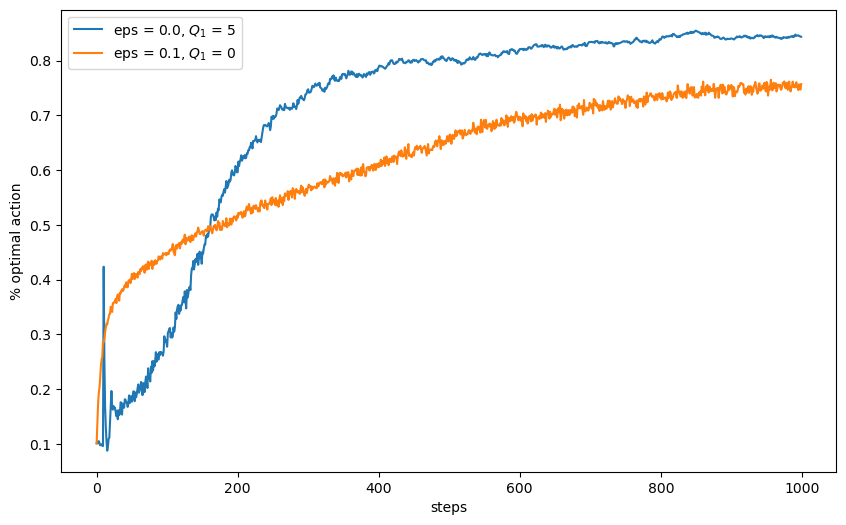

In [5]:
import matplotlib.pyplot as plt

n_arm = 10
opt_acts = {}
for q_init, eps in [(5, 0.0), (0, 0.1)]:
	res = [single_bandit(n_arm, np.random.randn(n_arm), np.zeros(n_arm) + q_init, eps, 1000, 0.1, True) for i in range(2000)]
	rs_, as_ = np.array(list(zip(*res))).mean(axis=1)
	opt_acts[eps] = as_

plt.figure(figsize=(10, 6))

for k, q_init in zip(opt_acts, [5, 0]):
	plt.plot(opt_acts[k], label=f'eps = {k}, $Q_1$ = {q_init}')
plt.xlabel('steps')
plt.ylabel('% optimal action')
plt.legend()
plt.show()

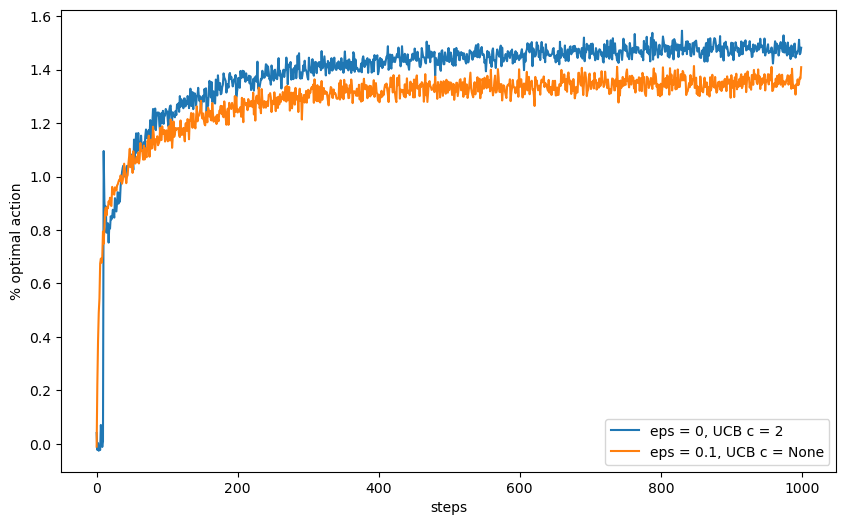

In [6]:
import matplotlib.pyplot as plt

n_arm = 10
plt.figure(figsize=(10, 6))
for ucb_c, eps in [(2, 0), (None, 0.1)]:
	res = [single_bandit(n_arm, np.random.randn(n_arm), np.zeros(n_arm), eps, 1000, ucb_c=ucb_c) for i in range(2000)]
	rs_, as_ = np.array(list(zip(*res))).mean(axis=1)
	plt.plot(rs_, label=f'eps = {eps}, UCB c = {ucb_c}')
plt.xlabel('steps')
# plt.ylabel('average reward')
plt.ylabel('% optimal action')
# plt.xlim(-10, 40)
plt.legend()
plt.show()

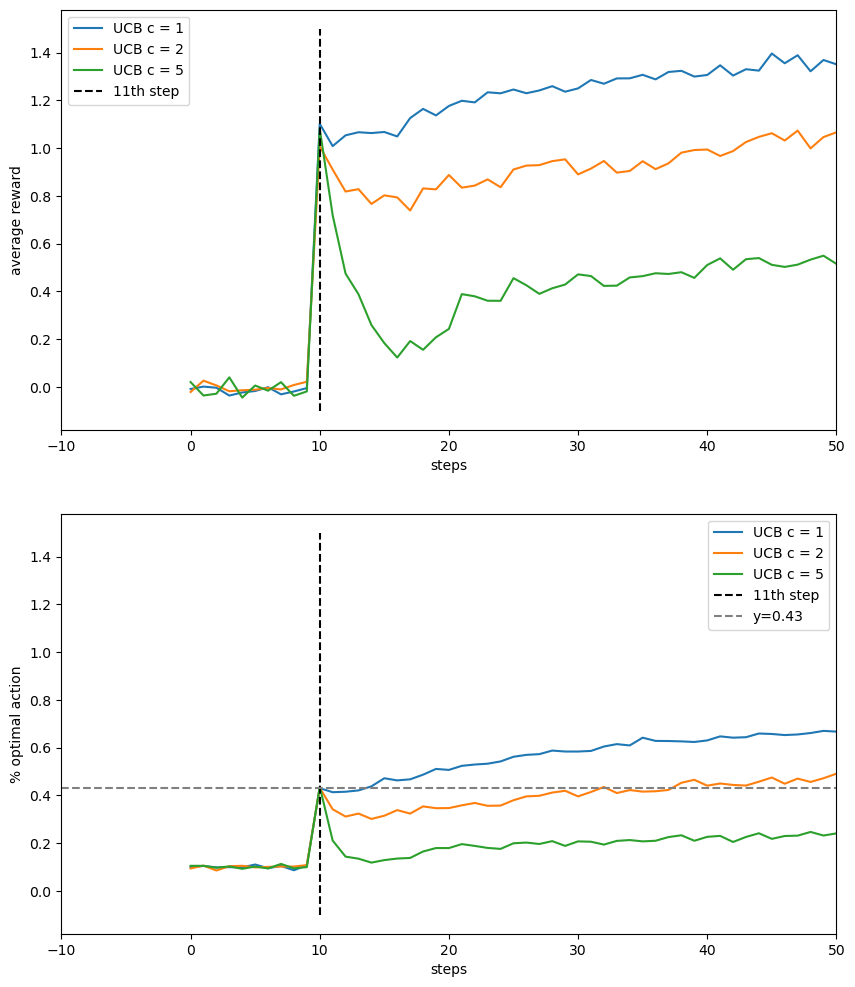

In [142]:
import matplotlib.pyplot as plt

n_arm = 10
rewards = {}
opt_acts = {}
for ucb_c in [1, 2, 5]:
	res = [single_bandit(n_arm, np.random.randn(n_arm), np.zeros(n_arm), 0, 100, ucb_c=ucb_c) for i in range(2000)]
	rs_, as_ = np.array(list(zip(*res))).mean(axis=1)
	rewards[ucb_c] = rs_
	opt_acts[ucb_c] = as_

plt.figure(figsize=(10, 12))

plt.subplot(2, 1, 1)
for k, v in rewards.items():
	plt.plot(v, label=f'UCB c = {k}')
plt.vlines(10, -0.1, 1.5, linestyle='--', colors='black', label='11th step')
plt.xlabel('steps')
plt.xlim(-10, 50)
plt.ylabel('average reward')
plt.legend()

plt.subplot(2, 1, 2)
for k, v in opt_acts.items():
	plt.plot(v, label=f'UCB c = {k}')
plt.vlines(10, -0.1, 1.5, linestyle='--', colors='black', label='11th step')
plt.hlines(0.43, -10, 50, linestyle='--', colors='gray', label='y=0.43')
plt.xlabel('steps')
plt.xlim(-10, 50)
plt.ylabel('% optimal action')
plt.legend()
plt.show()

In [147]:
def max_w_random(n_arm, c=1):
	"""
	This shows why the spike's size is about 0.43. 
	Basically to check how often you get the true max when you add a random number to it.
	"""
	q_true = np.random.randn(n_arm)
	oa_true = np.argmax(q_true)
	oa_w_random = np.argmax(q_true + c * np.random.randn(n_arm))
	return oa_true == oa_w_random

samples = 20000
ts = [max_w_random(10, 1) for i in range(samples)]
print(np.mean(ts))

0.42705


In [148]:
def get_limit(n_arm, samples=10000):
	"""
	This show why the limit is around 1.54.
	Check the mean of the max of n_arm random variables.
	Theoretically: 
	1. https://stats.stackexchange.com/questions/381212/distribution-of-maximum-of-normally-distributed-random-variables
	2. https://math.stackexchange.com/questions/275414/distribution-of-largest-sample-from-normal-distribution
	"""
	x = np.random.randn(10000, 10)
	return np.max(x, axis=1).mean()

print(get_limit(10))

1.5282670682966728
